# Import and Downloads

## Install Modules

In [1]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 14.4 MB/s 


In [2]:
! git clone https://github.com/GuiSilvaPA/TextToImage.git

Cloning into 'TextToImage'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 262 (delta 20), reused 27 (delta 11), pack-reused 226
Receiving objects: 100% (262/262), 21.05 MiB | 18.66 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [3]:
!pip install pytorch-ignite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 259 kB 14.5 MB/s 


In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 14.5 MB/s 
     |████████████████████████████████| 101 kB 14.2 MB/s 
     |████████████████████████████████| 6.6 MB 43.5 MB/s 
     |████████████████████████████████| 596 kB 71.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
!pip install resize_right

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install einops_exts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [8]:
import sys
sys.path.insert(0,'/content/TextToImage/Imagen')

In [9]:
import torch
from Imagen import Imagen

Downloading:   0%|          | 0.00/537 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.6.layer.2.layer_norm.weight', 'decoder.block.4.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.0.SelfAttention.o.weight', 'decoder.block.3.layer.0.SelfAttention.q.weight', 'decoder.block.6.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.5.layer.0.SelfAttention.k.weight', 'decoder.block.7.layer.1.EncDecAttention.k.weight', 'decoder.block.1.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.5.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.q.weight', 'decoder.block.7.layer.0.SelfAttention.v.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.4.layer.

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.81k [00:00<?, ?B/s]

In [10]:
from OldComplexModels import UNet
from ImagenTools import CustomDataset, ImagenTrainer

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.6.layer.2.layer_norm.weight', 'decoder.block.4.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.0.SelfAttention.o.weight', 'decoder.block.3.layer.0.SelfAttention.q.weight', 'decoder.block.6.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.5.layer.0.SelfAttention.k.weight', 'decoder.block.7.layer.1.EncDecAttention.k.weight', 'decoder.block.1.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.5.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.q.weight', 'decoder.block.7.layer.0.SelfAttention.v.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.4.layer.

In [11]:
from torch.utils.data import Dataset, DataLoader
import json
import h5py
import numpy as np
from torchvision import transforms
import random

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch.nn as nn

from torch.optim import Adam
from pathlib import Path

import cv2

from google.colab import drive

import torchvision.transforms as T

In [12]:
drive.mount("/content/drive")

Mounted at /content/drive


# Dataset

In [13]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [14]:
from torchvision import datasets

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_set = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
valid_set = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [15]:
train_loader = DataLoader(train_set, batch_size=20, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=1,   shuffle=False)

### Dataset Tester

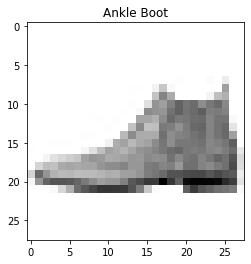

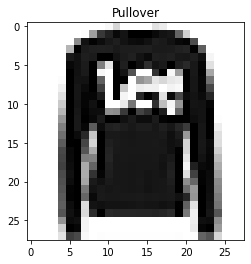

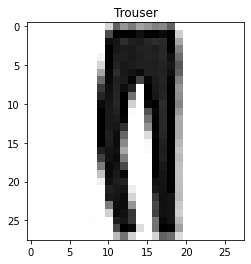

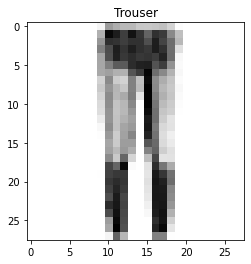

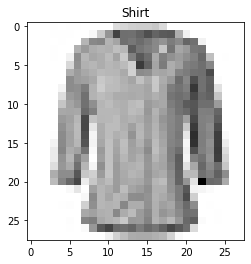

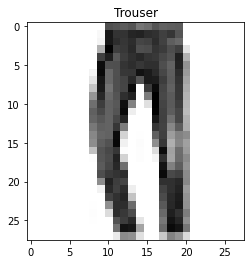

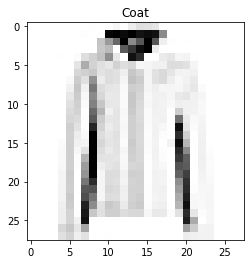

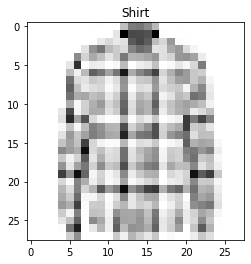

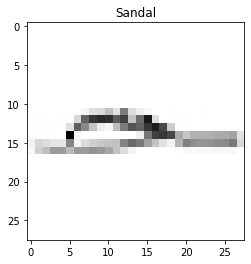

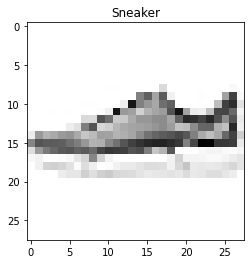

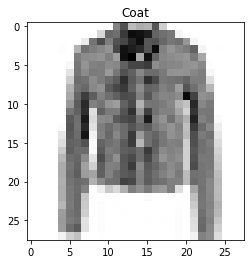

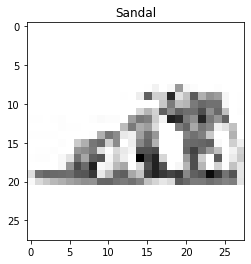

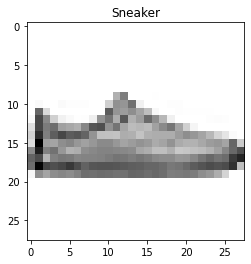

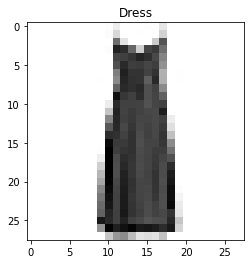

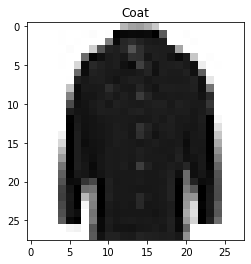

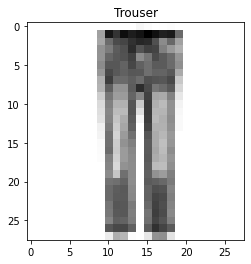

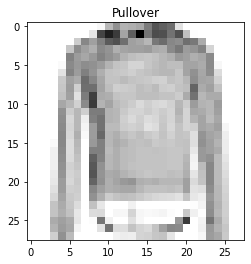

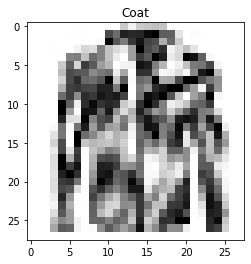

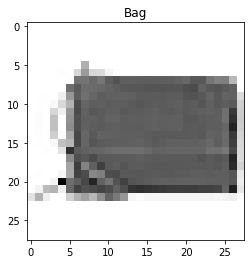

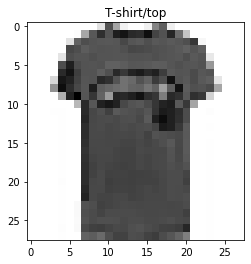

In [16]:
m = 0
for i, t in valid_loader:
    m += 1

    plt.imshow((i[0][0].numpy()+1)/2, cmap='Greys', interpolation='nearest') # adversarial
    plt.title(classes[t])
    plt.show()

    if m == 20: break

# Model Initialization

In [17]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [18]:
unet1 = UNet(dim = 80, cond_dim = 512, text_embed_dim = 512,  # 64
             dim_mults = (1, 2), num_resnet_blocks = 3, # (1, 2, 4, 8) - 3
             channels = 1,
             layer_attns = (False, True), 
             layer_cross_attns = (False, True), device=device).to(device)

imgen_model = Imagen((unet1,), image_sizes=(28,), timesteps=2000, channels = 1,
                      text_encoder_name = 'google/t5-v1_1-small', cond_drop_prob = 0.3, device=device).to(device) # 0.1

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.6.layer.2.layer_norm.weight', 'decoder.block.4.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.3.layer.0.SelfAttention.o.weight', 'decoder.block.3.layer.0.SelfAttention.q.weight', 'decoder.block.6.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.5.layer.0.SelfAttention.k.weight', 'decoder.block.7.layer.1.EncDecAttention.k.weight', 'decoder.block.1.layer.1.EncDecAttention.v.weight', 'decoder.block.7.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.5.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.1.EncDecAttention.q.weight', 'decoder.block.7.layer.0.SelfAttention.v.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.4.layer.

# Model Training

### Modified Trainer

In [19]:
class ImagenTrainer(nn.Module):

    def __init__(self, imagen, epochs = 10, first_epoch=1, p=1, lr = 1e-4, eps = 1e-8,
                 beta1 = 0.9, beta2 = 0.99, device='cpu'):

        super(ImagenTrainer, self).__init__()

        self.p           = p
        self.imagen      = imagen
        self.unet        = imagen.unets[0]
        self.device      = device
        self.first_epoch = first_epoch
        self.optimizer   = Adam(self.unet.parameters(), lr=lr, eps=eps, betas=(beta1, beta2))
        self.epochs      = epochs

    def save(self, path):

        path = Path(path)
        path.parent.mkdir(parents=True, exist_ok=True)

        torch.save(self.imagen.state_dict(), str(path))

    def load(self, path):

        path = Path(path)
        self.imagen.load_state_dict(torch.load(str(path)))

    @torch.no_grad()
    def sample(self, texts, cond_scale):
        
        output = self.imagen.sample(texts=texts, cond_scale=cond_scale)
        return output

    @torch.no_grad()
    def validation_loss(self, data):

        total_loss = 0.

        m = 0
        for images, index in tqdm(data):

                m += 1

                classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
                texts   = [classes[ind] for ind in index]

                images = images.float().to(self.device)

                loss = self.imagen(images, texts=texts, device=self.device)

                total_loss += loss.item()

                if m == 1000: break

        return total_loss/1000

    def forward(self, train_data, valid_data, path=None, inter_path=None, save_new_each=10):

        train_loss_per_epoch, valid_loss_per_epoch = [], []
        save_path = None

        for epoch in tqdm(range(self.first_epoch, self.epochs+1)):

            total_loss = 0.

            print(f'\n================================ EPOCH {epoch} ================================\n')

            for images, index in tqdm(train_data):

                classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
                texts   = [classes[ind] for ind in index]

                images = images.float().to(self.device)

                self.optimizer.zero_grad()

                loss = self.imagen(images, texts=texts, device=self.device)
                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()

            total_train_loss = total_loss/len(train_data)
            total_valid_loss = self.validation_loss(valid_data)

            train_loss_per_epoch.append(total_train_loss)
            valid_loss_per_epoch.append(total_valid_loss)

            if path is not None:

                if (epoch - 1) % save_new_each == 0:
                    self.p += 1
                    save_path = path + str(self.p) + '.pth.tar'

                if save_path is not None:
                    self.save(save_path)
                else:
                    self.save(inter_path)

            print(f'\nEpoch: {epoch} | Train Loss: {total_train_loss} | Valid Loss: {total_valid_loss}')

        plt.plot(train_loss_per_epoch, label="Training")
        plt.plot(valid_loss_per_epoch, label="Validating")
        plt.title('Loss x Epoch')
        plt.show()

In [20]:
imgs, index = next(iter(train_loader))

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
texts   = [classes[ind] for ind in index]

images_out  = trainer.sample(texts=texts, cond_scale = 3.)

NameError: ignored

In [ ]:
for img, im, text in zip(images_out.cpu(), imgs.cpu(), texts):
    # Para apresentar as imagens é necessario desfazer a normalização empregada nas imagens
    fig = plt.figure(figsize=(10, 5))

    fig.add_subplot(1, 2, 1)
    plt.imshow((img[0].numpy()+1)/2, cmap='Greys', interpolation='nearest')
    plt.title('Generated Image')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.imshow((im[0].numpy()+1)/2, cmap='Greys', interpolation='nearest')
    plt.title('Reference Image')
    plt.axis('off')

    fig.suptitle(text)

    plt.show()

    print('\n=========================================================================== \n')

## Training

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs=20, first_epoch=1, p=1,
                        lr=1e-4, eps=1e-8, beta1=0.9, beta2=0.99, device=device)

In [ ]:
trainer(train_loader, valid_loader, path='/content/drive/MyDrive/Guilherme/v1p')

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 1 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 1 | Train Loss: 0.09109466589863102 | Valid Loss: 0.04398813062103

================================ EPOCH 2 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 2 | Train Loss: 0.07219044549639027 | Valid Loss: 0.04160137699038023

================================ EPOCH 3 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 3 | Train Loss: 0.06851449782152971 | Valid Loss: 0.04092080363596324

================================ EPOCH 4 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 4 | Train Loss: 0.0666081485375762 | Valid Loss: 0.03795421744073974

================================ EPOCH 5 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 5 | Train Loss: 0.06543643827674289 | Valid Loss: 0.03759260982857086

================================ EPOCH 6 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 6 | Train Loss: 0.06422576191214224 | Valid Loss: 0.03740918447234435

================================ EPOCH 7 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs=20, first_epoch=6, p=1,
                        lr=1e-4, eps=1e-8, beta1=0.9, beta2=0.99, device=device)

In [ ]:
trainer.load('/content/drive/MyDrive/Guilherme/v1p2.pth.tar')

  0%|          | 0/15 [00:00<?, ?it/s]


================================ EPOCH 6 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 6 | Train Loss: 0.06347234187026819 | Valid Loss: 0.03676021327462513

================================ EPOCH 7 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 7 | Train Loss: 0.06331547080477079 | Valid Loss: 0.03790660247561755

================================ EPOCH 8 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 8 | Train Loss: 0.0625174135317405 | Valid Loss: 0.0353716012200166

================================ EPOCH 9 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 9 | Train Loss: 0.062376566576461 | Valid Loss: 0.036878667195444

================================ EPOCH 10 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 10 | Train Loss: 0.06175714098165433 | Valid Loss: 0.03506107123036054

================================ EPOCH 11 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 11 | Train Loss: 0.061625579702978335 | Valid Loss: 0.035958154240535806

================================ EPOCH 12 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 12 | Train Loss: 0.061425840367252627 | Valid Loss: 0.03629575343173928

================================ EPOCH 13 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 13 | Train Loss: 0.061128806464994946 | Valid Loss: 0.03559441605018219

================================ EPOCH 14 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 14 | Train Loss: 0.06120459406450391 | Valid Loss: 0.035698983430862426

================================ EPOCH 15 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 15 | Train Loss: 0.06097041510480146 | Valid Loss: 0.03515114469852415

================================ EPOCH 16 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 16 | Train Loss: 0.060577866152549786 | Valid Loss: 0.03548561776516726

================================ EPOCH 17 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 17 | Train Loss: 0.06039004036970436 | Valid Loss: 0.03511535526481748

================================ EPOCH 18 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 18 | Train Loss: 0.06015327416422466 | Valid Loss: 0.03532127075488097

================================ EPOCH 19 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 19 | Train Loss: 0.06033699122071266 | Valid Loss: 0.03566470774626941

================================ EPOCH 20 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 20 | Train Loss: 0.06024079661257565 | Valid Loss: 0.0355683948899823


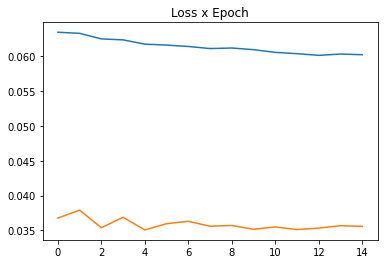

In [ ]:
trainer(train_loader, valid_loader,
        path='/content/drive/MyDrive/Guilherme/v1p',
        inter_path='/content/drive/MyDrive/Guilherme/v1p2.pth.tar')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs=50, first_epoch=21, p=2,
                        lr=1e-4, eps=1e-8, beta1=0.9, beta2=0.99, device=device)

  0%|          | 0/30 [00:00<?, ?it/s]


================================ EPOCH 21 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 21 | Train Loss: 0.060109629198908804 | Valid Loss: 0.03512739686414716

================================ EPOCH 22 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 22 | Train Loss: 0.06000704654802879 | Valid Loss: 0.03524280916279531

================================ EPOCH 23 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 23 | Train Loss: 0.059942843983570734 | Valid Loss: 0.034458307362991034

================================ EPOCH 24 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 24 | Train Loss: 0.059613904245197774 | Valid Loss: 0.034692239287513076

================================ EPOCH 25 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 25 | Train Loss: 0.0594525324900945 | Valid Loss: 0.03556326250807615

================================ EPOCH 26 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 26 | Train Loss: 0.0593432465971758 | Valid Loss: 0.033955239437986166

================================ EPOCH 27 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 27 | Train Loss: 0.05932654682050149 | Valid Loss: 0.03581592490286857

================================ EPOCH 28 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 28 | Train Loss: 0.059125728817035754 | Valid Loss: 0.0334533021057432

================================ EPOCH 29 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 29 | Train Loss: 0.05910810583208998 | Valid Loss: 0.034896473837463415

================================ EPOCH 30 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 30 | Train Loss: 0.059014300329610705 | Valid Loss: 0.03422475304314867

================================ EPOCH 31 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 31 | Train Loss: 0.05892653360652427 | Valid Loss: 0.034125979142510914

================================ EPOCH 32 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 32 | Train Loss: 0.05897645748655001 | Valid Loss: 0.03436125406586507

================================ EPOCH 33 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 33 | Train Loss: 0.05886843855989476 | Valid Loss: 0.03447516294584784

================================ EPOCH 34 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 34 | Train Loss: 0.058713507103423275 | Valid Loss: 0.03492379887669813

================================ EPOCH 35 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 35 | Train Loss: 0.05888567956537008 | Valid Loss: 0.03466791219885636

================================ EPOCH 36 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 36 | Train Loss: 0.058827876462290686 | Valid Loss: 0.03551976475030824

================================ EPOCH 37 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 37 | Train Loss: 0.058645098264639574 | Valid Loss: 0.034542371797710074

================================ EPOCH 38 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 38 | Train Loss: 0.0583338503409177 | Valid Loss: 0.03441767521863221

================================ EPOCH 39 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 39 | Train Loss: 0.058148175098622835 | Valid Loss: 0.033945441756543

================================ EPOCH 40 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 40 | Train Loss: 0.058377082047363124 | Valid Loss: 0.03351262678201601

================================ EPOCH 41 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 41 | Train Loss: 0.058555267645046115 | Valid Loss: 0.033629607020382535

================================ EPOCH 42 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 42 | Train Loss: 0.058351820652062694 | Valid Loss: 0.034164747101633114

================================ EPOCH 43 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 43 | Train Loss: 0.05825581927162905 | Valid Loss: 0.03369247395431739

================================ EPOCH 44 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 44 | Train Loss: 0.05816997735699018 | Valid Loss: 0.03522482977459731

================================ EPOCH 45 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 45 | Train Loss: 0.058317344445114334 | Valid Loss: 0.03326963078021072

================================ EPOCH 46 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 46 | Train Loss: 0.058194277505079904 | Valid Loss: 0.034890595358199786

================================ EPOCH 47 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 47 | Train Loss: 0.05793947634100914 | Valid Loss: 0.033998205241077814

================================ EPOCH 48 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 48 | Train Loss: 0.05802705676481128 | Valid Loss: 0.03545044893946033

================================ EPOCH 49 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 49 | Train Loss: 0.05817871870286763 | Valid Loss: 0.034279395179502896

================================ EPOCH 50 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 50 | Train Loss: 0.057762516361971696 | Valid Loss: 0.034102677290909926


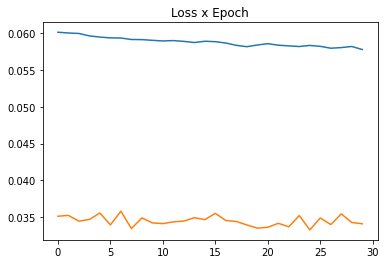

In [ ]:
trainer(train_loader, valid_loader, path='/content/drive/MyDrive/Guilherme/v1p')

Obtendo a imagem ...:   0%|          | 0/2000 [00:00<?, ?it/s]

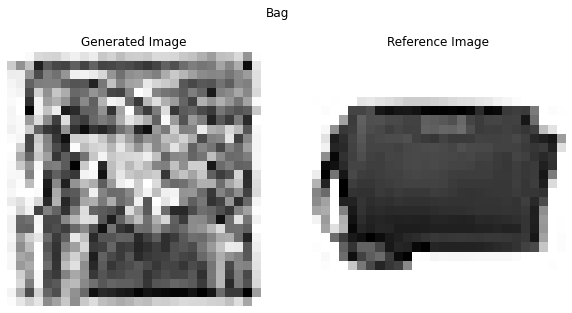

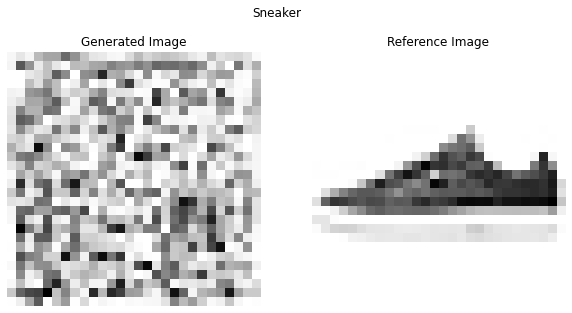

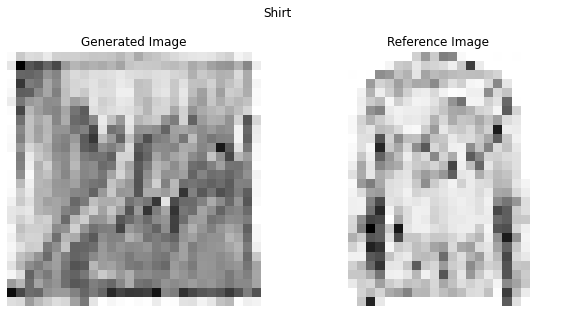

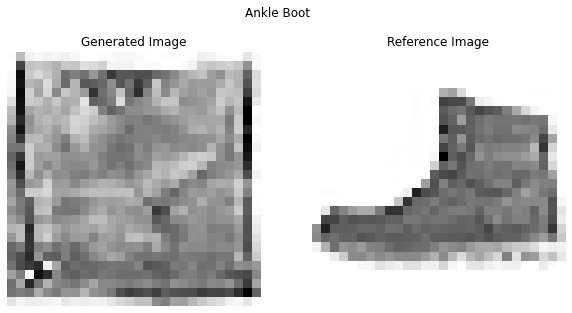

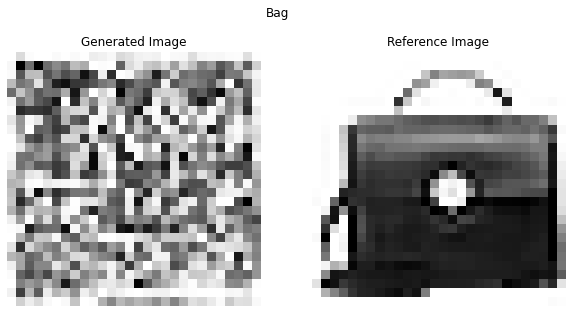

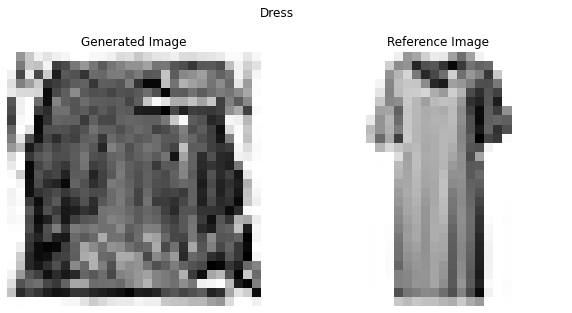

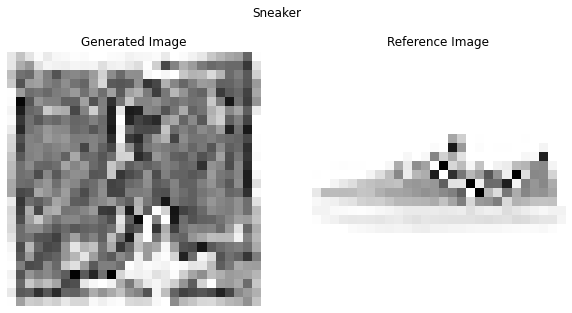

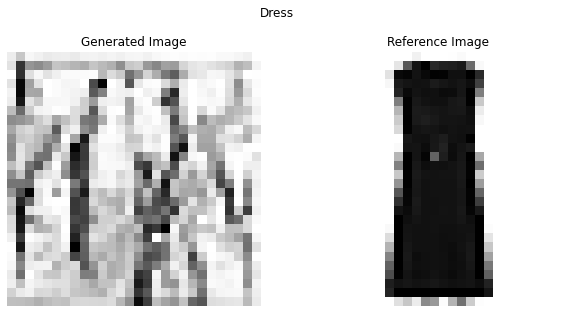

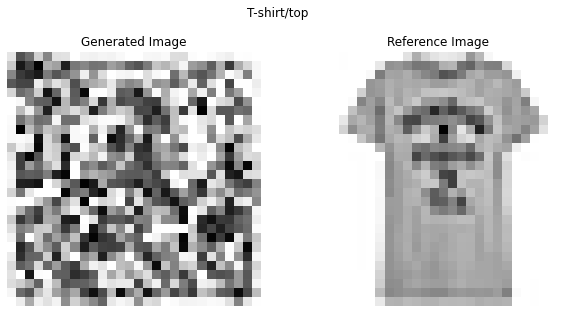

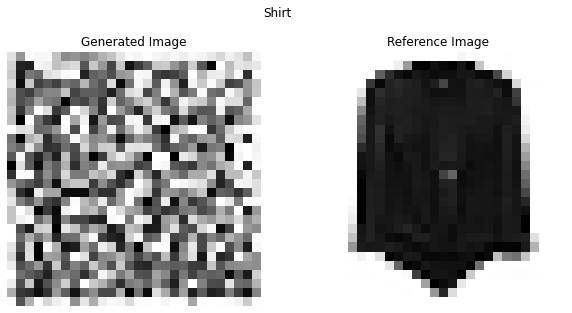

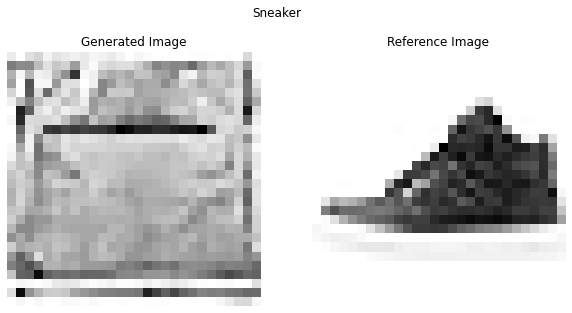

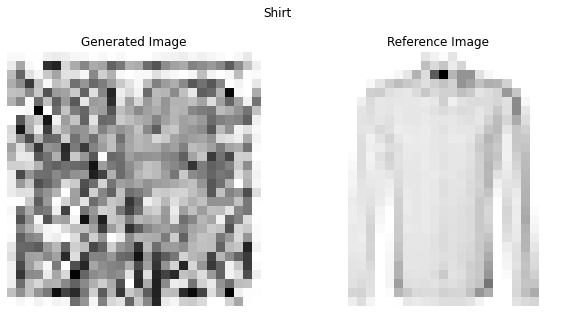

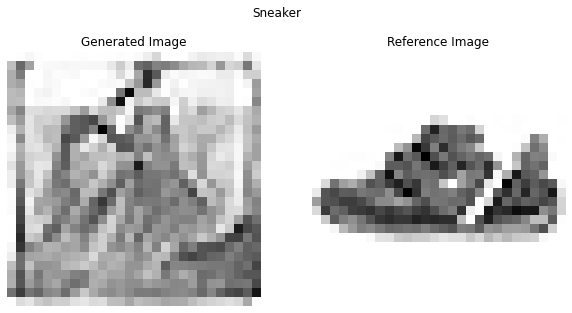

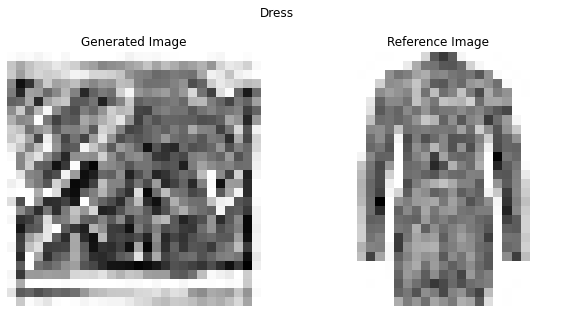

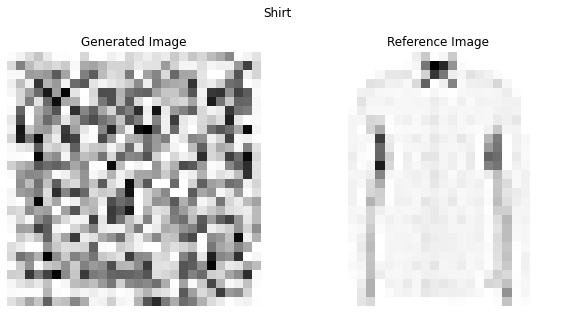

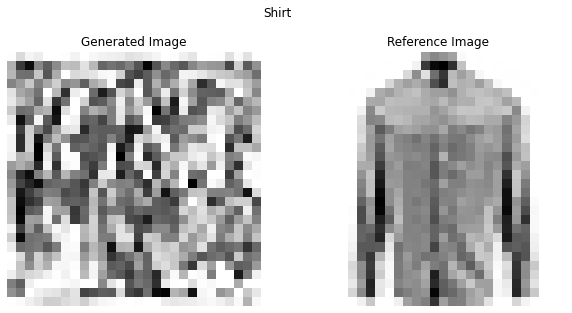

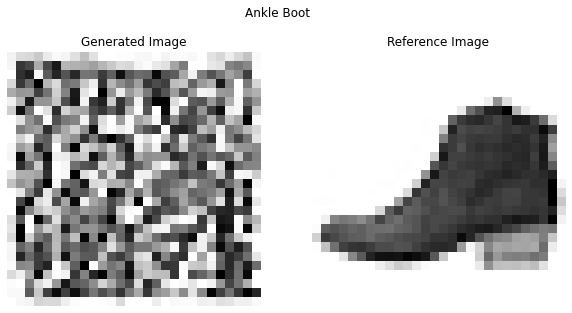

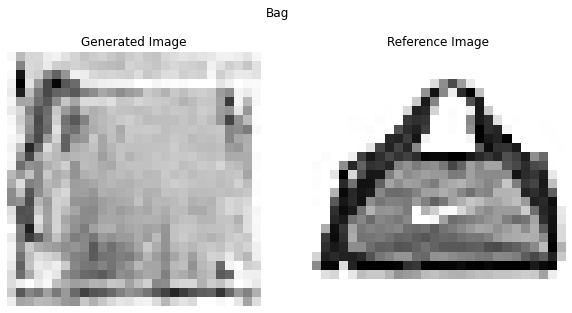

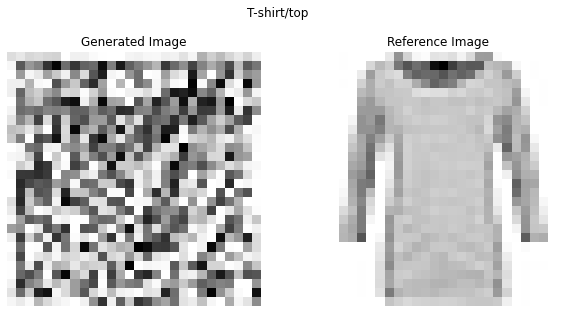

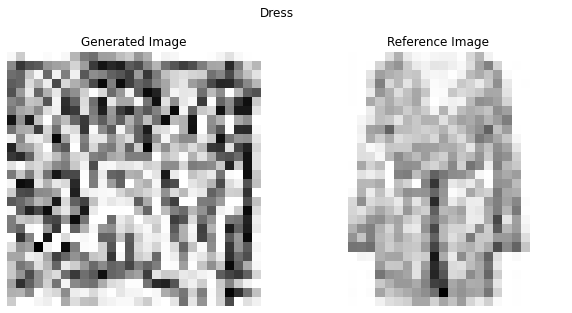

In [ ]:
imgs, index = next(iter(train_loader))

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
texts   = [classes[ind] for ind in index]

images_out  = trainer.sample(texts=texts, cond_scale = 3.)

for img, im, text in zip(images_out.cpu(), imgs.cpu(), texts):
    # Para apresentar as imagens é necessario desfazer a normalização empregada nas imagens
    fig = plt.figure(figsize=(10, 5))

    fig.add_subplot(1, 2, 1)
    plt.imshow((img[0].numpy()+1)/2, cmap='Greys', interpolation='nearest')
    plt.title('Generated Image')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.imshow((im[0].numpy()+1)/2, cmap='Greys', interpolation='nearest')
    plt.title('Reference Image')
    plt.axis('off')

    fig.suptitle(text)

    plt.show()

    print('\n=========================================================================== \n')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs=100, first_epoch=51, p=5,
                        lr=1e-4, eps=1e-8, beta1=0.9, beta2=0.99, device=device)

In [ ]:
trainer(train_loader, valid_loader, path='/content/drive/MyDrive/Guilherme/v1p')

  0%|          | 0/50 [00:00<?, ?it/s]


================================ EPOCH 51 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 51 | Train Loss: 0.05769991708857318 | Valid Loss: 0.033849619535802046

================================ EPOCH 52 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 52 | Train Loss: 0.0576947174128145 | Valid Loss: 0.034806084235016896

================================ EPOCH 53 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 53 | Train Loss: 0.057553271854296324 | Valid Loss: 0.03507287417929911

================================ EPOCH 54 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 54 | Train Loss: 0.05786711147613823 | Valid Loss: 0.03473649101739284

================================ EPOCH 55 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 55 | Train Loss: 0.058062088523060086 | Valid Loss: 0.034337083007725595

================================ EPOCH 56 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 56 | Train Loss: 0.05758429279861351 | Valid Loss: 0.03392513910074194

================================ EPOCH 57 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 57 | Train Loss: 0.05764821236456434 | Valid Loss: 0.033651516163823544

================================ EPOCH 58 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 58 | Train Loss: 0.05767855610450109 | Valid Loss: 0.03409982549781125

================================ EPOCH 59 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 59 | Train Loss: 0.05764235282378892 | Valid Loss: 0.034217393447819634

================================ EPOCH 60 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 60 | Train Loss: 0.057518534071122604 | Valid Loss: 0.03320621295723686

================================ EPOCH 61 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 61 | Train Loss: 0.057569539153948426 | Valid Loss: 0.032851991771058235

================================ EPOCH 62 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 62 | Train Loss: 0.057335314673061175 | Valid Loss: 0.03378481094056042

================================ EPOCH 63 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 63 | Train Loss: 0.05726783521535496 | Valid Loss: 0.03349735036150378

================================ EPOCH 64 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
trainer.load('/content/drive/MyDrive/Guilherme/TextToImage28/v1p5.pth.tar')

In [21]:
trainer = ImagenTrainer(imgen_model, epochs=100, first_epoch=64, p=7,
                        lr=1e-4, eps=1e-8, beta1=0.9, beta2=0.99, device=device)

In [24]:
trainer.load('/content/drive/MyDrive/Guilherme/v1p7.pth.tar')

  0%|          | 0/37 [00:00<?, ?it/s]


================================ EPOCH 64 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 64 | Train Loss: 0.05742951342960199 | Valid Loss: 0.03363112869460019

================================ EPOCH 65 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 65 | Train Loss: 0.0574317874374489 | Valid Loss: 0.035007880604709496

================================ EPOCH 66 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 66 | Train Loss: 0.057290215610216064 | Valid Loss: 0.034781608641817

================================ EPOCH 67 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 67 | Train Loss: 0.05713545940257609 | Valid Loss: 0.033871916167285236

================================ EPOCH 68 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 68 | Train Loss: 0.05719804161724945 | Valid Loss: 0.03316728689383308

================================ EPOCH 69 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 69 | Train Loss: 0.05738737933213512 | Valid Loss: 0.03356565027274337

================================ EPOCH 70 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 70 | Train Loss: 0.05731133213825524 | Valid Loss: 0.033261858871148436

================================ EPOCH 71 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 71 | Train Loss: 0.057311599772423505 | Valid Loss: 0.0341332159081212

================================ EPOCH 72 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 72 | Train Loss: 0.05701309327284495 | Valid Loss: 0.03253381301276386

================================ EPOCH 73 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 73 | Train Loss: 0.05697318928440412 | Valid Loss: 0.03377871442685137

================================ EPOCH 74 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 74 | Train Loss: 0.05714904408405225 | Valid Loss: 0.03283989199478674

================================ EPOCH 75 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 75 | Train Loss: 0.05720040111926695 | Valid Loss: 0.035525985340136686

================================ EPOCH 76 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 76 | Train Loss: 0.05676039493953188 | Valid Loss: 0.03317859534965828

================================ EPOCH 77 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 77 | Train Loss: 0.05694382600610455 | Valid Loss: 0.03348215078470821

================================ EPOCH 78 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 78 | Train Loss: 0.057353151279191175 | Valid Loss: 0.03350167592261278

================================ EPOCH 79 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 79 | Train Loss: 0.056802165895079575 | Valid Loss: 0.0328614955170342

================================ EPOCH 80 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 80 | Train Loss: 0.056739563783009844 | Valid Loss: 0.033515935128176355

================================ EPOCH 81 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 81 | Train Loss: 0.05704939083879192 | Valid Loss: 0.033088189981368483

================================ EPOCH 82 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 82 | Train Loss: 0.05714352192729712 | Valid Loss: 0.033859186332832907

================================ EPOCH 83 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 83 | Train Loss: 0.05668173267133534 | Valid Loss: 0.034059592823992714

================================ EPOCH 84 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 84 | Train Loss: 0.05670693368278444 | Valid Loss: 0.03497734091746679

================================ EPOCH 85 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 85 | Train Loss: 0.05661384284247955 | Valid Loss: 0.03355208780145767

================================ EPOCH 86 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 86 | Train Loss: 0.05681571635790169 | Valid Loss: 0.03426294144568237

================================ EPOCH 87 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 87 | Train Loss: 0.05673504196666181 | Valid Loss: 0.034007819101556376

================================ EPOCH 88 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 88 | Train Loss: 0.05680233993940055 | Valid Loss: 0.03379511662167351

================================ EPOCH 89 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 89 | Train Loss: 0.05640314882062376 | Valid Loss: 0.033775260239592174

================================ EPOCH 90 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 90 | Train Loss: 0.056553797090426086 | Valid Loss: 0.03438587178367743

================================ EPOCH 91 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 91 | Train Loss: 0.05669976659057041 | Valid Loss: 0.03407988848471723

================================ EPOCH 92 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 92 | Train Loss: 0.05663753318724533 | Valid Loss: 0.03371478061786183

================================ EPOCH 93 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 93 | Train Loss: 0.056463750353083014 | Valid Loss: 0.032878442697110585

================================ EPOCH 94 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 94 | Train Loss: 0.05659114054155846 | Valid Loss: 0.03269483271213539

================================ EPOCH 95 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 95 | Train Loss: 0.0566366734256347 | Valid Loss: 0.03277707393255696

================================ EPOCH 96 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 96 | Train Loss: 0.05632227831147611 | Valid Loss: 0.03387367173633538

================================ EPOCH 97 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 97 | Train Loss: 0.05664042756954829 | Valid Loss: 0.032709367380157346

================================ EPOCH 98 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 98 | Train Loss: 0.056632319885616504 | Valid Loss: 0.03333536834728147

================================ EPOCH 99 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 99 | Train Loss: 0.056525506446138025 | Valid Loss: 0.033517512437691035

================================ EPOCH 100 ================================



  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]


Epoch: 100 | Train Loss: 0.05615779777678351 | Valid Loss: 0.03334905420400901


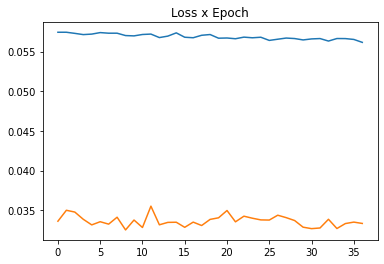

In [25]:
trainer(train_loader, valid_loader,
        path='/content/drive/MyDrive/Guilherme/v1p',
        inter_path='/content/drive/MyDrive/Guilherme/v1p7.pth.tar')

In [ ]:
imgs, index = next(iter(train_loader))

classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
texts   = [classes[ind] for ind in index]

images_out  = trainer.sample(texts=texts, cond_scale = 3.)

for img, im, text in zip(images_out.cpu(), imgs.cpu(), texts):
    # Para apresentar as imagens é necessario desfazer a normalização empregada nas imagens
    fig = plt.figure(figsize=(10, 5))

    fig.add_subplot(1, 2, 1)
    plt.imshow((img[0].numpy()+1)/2, cmap='Greys', interpolation='nearest')
    plt.title('Generated Image')
    plt.axis('off')

    fig.add_subplot(1, 2, 2)
    plt.imshow((im[0].numpy()+1)/2, cmap='Greys', interpolation='nearest')
    plt.title('Reference Image')
    plt.axis('off')

    fig.suptitle(text)

    plt.show()

    print('\n=========================================================================== \n')

Obtendo a imagem ...:   0%|          | 0/2000 [00:00<?, ?it/s]